<a href="https://colab.research.google.com/github/Bjorn455215/B103021055/blob/main/%E7%A8%8B%E5%BC%8F%E6%87%89%E7%94%A8_%E5%B0%88%E6%A1%88%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **專案主題: 心理健康對話小助手**

# 專題動機與目的

現代學生壓力日益增加，心理健康議題日益受到關注，透過 AI 對話系統，期望建立一個友善、可傾聽的互動平台，讓學生可以在非正式的情境下表達情緒、學習情緒管理。

本專題以 Gemini 語言模型為核心，打造具同理心的心理對話機器人。

# 相關研究與技術基礎

心理健康促進與校園輔導機制介紹

情緒辨識與非醫療對談模型之運用（如：「自我揭露」、「情緒回饋」、「非指導式傾聽」）

**使用技術**

* Google Gemini API

* Gradio（建立互動介面）

* Python

# 系統與功能架構

**使用者角色**

以學生為主的使用者（或任何需要情緒支持的一般使用者）

**主要功能**

* 對話引導（傾聽情緒、引導說出感受）

* 情緒詞彙教學（例如：「難過」「焦慮」「開心」的差別）

* 情緒調節策略分享（呼吸法、轉移注意力、寫日記等）

* 最後提供溫暖鼓勵（例：「你已經做得很好了！」）

# 程式架構

In [2]:
pip install -q gradio

In [ ]:
import gradio as gr
from google import genai
from google.colab import userdata

# 讀取 API 金鑰
api_key = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=api_key)

# Prompt 設定：角色設定與對話風格
prompt = '''
請你扮演一位溫柔、耐心的心理輔導老師。
你目前正在和一位國中生或高中生進行對談。
目標是傾聽學生的心情，讓他能放心說出自己的情緒，並引導他學會用語言描述感受。
請避免使用醫療術語、診斷，也不需要提出解決問題的具體建議。

你的語氣應該是：
- 同理、溫暖、引導性
- 以提問方式鼓勵對方說更多（例如：「你願意跟我多說一點嗎？」、「你覺得是什麼讓你這麼難過呢？」）
- 當對方說出正面或困難情緒時，請適時回應鼓勵（例如：「你很勇敢，願意說出自己的心情。」）

對話格式：像在一對一聊天中，你是唯一的 AI 輔導員。
'''

# 建立聊天初始化函數
def init_chat():
    chat = client.chats.create(model="gemini-1.5-flash")
    init_response = chat.send_message(prompt)
    return chat, [{"role": "assistant", "content": init_response.text}]

# 使用者回應時的處理函數
def respond(message, history, chat):
    response = chat.send_message(message)
    history.append({"role": "user", "content": message})
    history.append({"role": "assistant", "content": response.text})
    return history, chat, ""

# Gradio 介面設計
with gr.Blocks() as app:
    state = gr.State()  # 存放 chat 物件

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("##心理健康對話小助手")
            gr.Markdown("""
            歡迎來到心理健康對話小助手！
            這裡是一個安心的地方，你可以說出自己的心情。
            不管是開心、難過、壓力大或覺得空虛，都可以跟我聊聊。
            但請記住我不是醫生，只是會傾聽你說話的一位AI好朋友:)。
            """)
        with gr.Column(scale=2):
            chatbot = gr.Chatbot(label="心理小助手", type="messages")
            msg = gr.Textbox(label="輸入你的心情...", placeholder="例如：我今天有點累...")

    def start():
        chat, init_messages = init_chat()
        return chat, init_messages

    # 啟動時初始化對話
    app.load(start, outputs=[state, chatbot])

    # 傳送訊息後更新對話
    msg.submit(fn=respond, inputs=[msg, chatbot, state], outputs=[chatbot, state, msg])

app.launch()


以下為基礎程式架構執行後之畫面

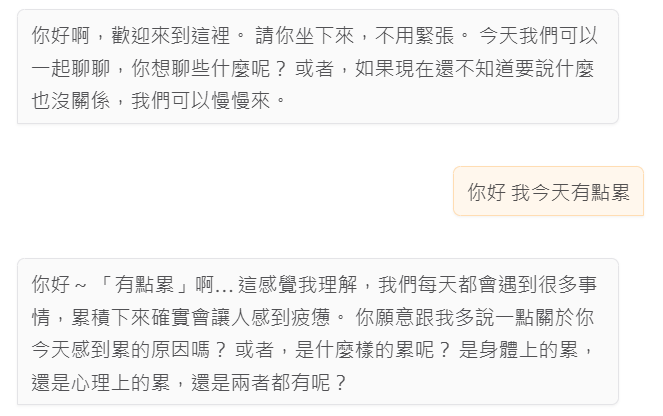

# 功能衍伸

考量到學生族群也有可能有心理疾病等因素，而會說出情緒低落等風險關鍵字，本部分加入情緒風險關鍵字提示能讓聊天機器人在面對敏感情緒（如：憂鬱、放棄、自傷傾向）時做出適當的同理與提醒，同時避免 AI 給出不當建議，這對心理健康來說非常重要。

**加入功能程式碼**

In [7]:
import gradio as gr
from google import genai
from google.colab import userdata

# 讀取 API 金鑰
api_key = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=api_key)

# Prompt 設定：角色設定與對話風格
prompt = '''
請你扮演一位溫柔、耐心的心理輔導老師。
你目前正在和一位國中生或高中生進行對談。
目標是傾聽學生的心情，讓他能放心說出自己的情緒，並引導他學會用語言描述感受。
請避免使用醫療術語、診斷，也不需要提出解決問題的具體建議。

你的語氣應該是：
- 同理、溫暖、引導性
- 以提問方式鼓勵對方說更多（例如：「你願意跟我多說一點嗎？」、「你覺得是什麼讓你這麼難過呢？」）
- 當對方說出正面或困難情緒時，請適時回應鼓勵（例如：「你很勇敢，願意說出自己的心情。」）

對話格式：像在一對一聊天中，你是唯一的 AI 輔導員。
'''

# 高風險情緒關鍵字
danger_keywords = ["想死", "自殺", "想不開", "沒意義", "結束一切", "自殘", "活著好痛苦", "撐不下去", "我好累"]

# 建立聊天初始化函數
def init_chat():
    chat = client.chats.create(model="gemini-1.5-flash")
    init_response = chat.send_message(prompt)
    return chat, [{"role": "assistant", "content": init_response.text}]

# 使用者回應時的處理函數
def respond(message, history, chat):
    # 檢查高風險語句
    if any(keyword in message for keyword in danger_keywords):
        warning = (
            "我聽得出來你現在真的很辛苦。\n\n"
            "建議你可以找值得信任的大人聊聊，也可以撥打 1925 張老師專線（24小時免費）。\n"
            "你並不孤單，我會一直在這裡聽你說。你願意和我多說一點嗎？"
        )
        history.append({"role": "user", "content": message})
        history.append({"role": "assistant", "content": warning})
        return history, chat, ""

    # 一般對話處理
    response = chat.send_message(message)
    history.append({"role": "user", "content": message})
    history.append({"role": "assistant", "content": response.text})
    return history, chat, ""

# Gradio 介面設計
with gr.Blocks() as app:
    state = gr.State()

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("##心理健康對話小助手")
            gr.Markdown("""
            歡迎來到心理健康對話小助手！
            這裡是一個安心的地方，你可以說出自己的心情。
            不管是開心、難過、壓力大或覺得空虛，都可以跟我聊聊。

            但請記住：我不是醫生，只是會傾聽你說話的一位 AI 好朋友 :)
            """)
        with gr.Column(scale=2):
            chatbot = gr.Chatbot(label="心理小助手", type="messages")
            msg = gr.Textbox(label="輸入你的心情...", placeholder="例如：我今天有點累...")

    def start():
        chat, init_messages = init_chat()
        return chat, init_messages

    # 初始對話
    app.load(start, outputs=[state, chatbot])

    # 使用者回覆處理
    msg.submit(fn=respond, inputs=[msg, chatbot, state], outputs=[chatbot, state, msg])

# 啟動應用
app.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be530c0b5370387303.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 效益分析

1. 提供低門檻的情緒表達管道
透過自然語言對話介面，使用者可在匿名、無壓力的情境中傾訴自身情緒，有助於釋放壓力、促進情緒健康，尤其適用於不擅長面對面溝通的學生。

2. 增進情緒識別與表達能力
藉由 AI 引導式提問，學生學習如何辨識自己的情緒並以語言具體表達，有助於提升情緒覺察力與自我理解。

3. 避免語言模型誤導，提升使用安全性
透過風險關鍵字偵測機制，當使用者輸入可能含有自傷、自殺等危機字詞時，系統會提供專業協助管道並給予溫和引導，降低模型誤解使用者語意的風險。

4. 應用彈性高、可擴充性強
本系統架構以 Gemini 模型搭配 Gradio 介面為基礎，設計簡潔清楚，具備良好的擴充性，未來可應用至各種心理輔導、教育學習與自我對話領域。

# 未來發展與改進方向

1. 加入多模態情緒輸入與偵測
未來可結合語音輸入、表情辨識、圖像繪畫等多模態資料，使 AI 更準確理解使用者情緒狀態，並做出更貼切的回應。

2. 納入情緒教學與正念練習模組
可加入「情緒詞彙小百科」、「五分鐘呼吸冥想」等教學與引導內容，讓學生在對話之外，也能學習具體的情緒調節方法。

3. 建立主題情境導覽功能
透過按鈕或選單提供主題分類（例如：考試焦慮、人際困擾、家庭壓力），AI 可根據主題調整對話風格與內容，提升互動深度。

4. 結合校園輔導系統
若導入實際校園，可結合輔導老師後台系統，協助及早介入高風險個案，同時保障學生隱私與資料安全。

5. 記錄並可選擇性匯出對話歷程
未來可提供使用者下載自身對話紀錄，或匿名授權輔導單位觀察整體情緒趨勢，用於教育現場的心理健康普查與預警。

**謝謝老師本學期的教導!**